In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")

In [3]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

## Lecture du dataset

On remarque que la Wave 6 à 9 ont pas la même méthode d'évaluation des préference, je vais donc préferer les enlevé du dataset.

Préference Scale de 6 à 9 est de 1-10 scale et le reste est 100pt alloc.

Pour faire notre évaluation sur les deuxième rendez-vous on vas regarder les notations global en comparaison des notations de ce qui on match.



In [4]:
# J'enlève la wave 6 à 9
df = df[(df["wave"] != 6) & (df["wave"] != 7) & (df["wave"] != 8) & (df["wave"] != 9)]

Maintenant nous allons faire le tri parmis c'est 195 columns, il y en a surment qui ne sont pas pértinente pour faire les analyses que nous avons besoin.




In [5]:
# Je garde les colonnes les plus pertinante pour mon analyse
df = df[["iid", "gender", "pid", "match", "int_corr", "samerace", "from", "date", "goal", "age", "go_out", "field", "career", "race", "career_c", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", \
        "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga", "exphappy", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1","attr", "sinc", "intel"]]

In [6]:
# verification des valeur manquante
display(100*df.isnull().sum()/df.shape[0])

iid          0.000000
gender       0.000000
pid          0.146714
match        0.000000
int_corr     2.171362
samerace     0.000000
from         1.085681
date         1.349765
goal         1.085681
age          1.320423
go_out       1.085681
field        0.850939
career       1.232394
race         0.850939
career_c     1.951291
sports       1.085681
tvsports     1.085681
exercise     1.085681
dining       1.085681
museums      1.085681
art          1.085681
hiking       1.085681
gaming       1.085681
clubbing     1.085681
reading      1.085681
tv           1.085681
theater      1.085681
movies       1.085681
concerts     1.085681
music        1.085681
shopping     1.085681
yoga         1.085681
exphappy     1.408451
attr1_1      1.085681
sinc1_1      1.085681
intel1_1     1.085681
fun1_1       1.232394
amb1_1       1.379108
shar1_1      1.701878
attr         2.846244
sinc         3.711854
intel        3.902582
fun          4.328052
amb          8.568075
shar        12.397300
like      

Nous voila avec un dataset plus lisible et sans trop de valeur manquante

regardons la proportion de femme et d'homme dans le dataset.

In [24]:
# mask pour visualiser les genre 
genre = df["gender"].value_counts(normalize=True).round(3)

pie = go.Figure()
pie.add_trace(go.Pie(
    values = genre,
    labels = ['Femme','Homme'],      
)  )
pie.update_layout(
    width=700,
    title= {'x' : 0.5},
    title_text="Distribution d'homme et de femmes",
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
pie.show()

La distribution d'homme et de femme est qu'asiment identique.


In [8]:
# filtre par genre
df_homme = df[(df["gender"] == 1)]
df_femme = df[(df["gender"] == 0)]

In [23]:
# Filtre par match pour visuelle
count_homme = df_homme["match"].value_counts(normalize=True).round(3)
count_femme = df_femme["match"].value_counts(normalize=True).round(3)

fig_pie = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                        subplot_titles=["Homme", "Femme"])

fig_pie.add_trace(go.Pie( 
     values=count_homme,
     labels=['No', 'Yes '],
     ),
     row=1, col=1)

fig_pie.add_trace(go.Pie(
     values=count_femme,
     labels=['No', 'Yes '],
     ),
    row=1, col=2)

fig_pie.update_layout(
    width=700,
    title= {'x' : 0.5},
    title_text='Match recensé par genre',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)

fig_pie.show()

Nombre de match r=est identique cher les Homme et Femme

In [36]:
# Visu  alisation de l'age par genre
fig_age = make_subplots(rows= 2, cols= 1,shared_xaxes = True, vertical_spacing = 0.01,)
fig_age.add_trace(
    go.Histogram(
        name='Male',
        x = df["age"][(df["gender"] == 1)],
        marker=dict(
        color='blue'
        )),
        row = 1,
        col = 1)

fig_age.add_trace(
    go.Histogram(
        name='Femme',
        x = df["age"][(df["gender"] == 0)],
              marker=dict(
        color='pink'
        )),
        row = 2,
        col = 1)
   

fig_age.update_layout( 
                    width=1000, 
                    height=500, 
                    title= {'x' : 0.5},
                    title_text="Distribution de l'âge des participants par genre",
                    )

fig_age.show()

regardon l'age moyen ça nous donnera une meilleur indiquation.

In [11]:
# Calcul de la moyenne d'age par genre
homme_mean = df_homme["age"].mean().round(2)
femme_mean = df_femme["age"].mean().round(2)

In [12]:
data = [["homme", homme_mean], ["femme", femme_mean]]
df_age_mean = pd.DataFrame(data, columns=["gender", "age mean"])
df_age_mean

,gender,age mean
0,homme,26.52
1,femme,26.04


La moyenne d'age est qu'asiment equivalente cher les Hommes et les Femmes

Faison un matix de corrélation pour voir ce qui est le plus correlé avec les matchs.

In [50]:
# matrix de corréletion
corr_attrb = df[["match", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]].corr()



<AxesSubplot: >

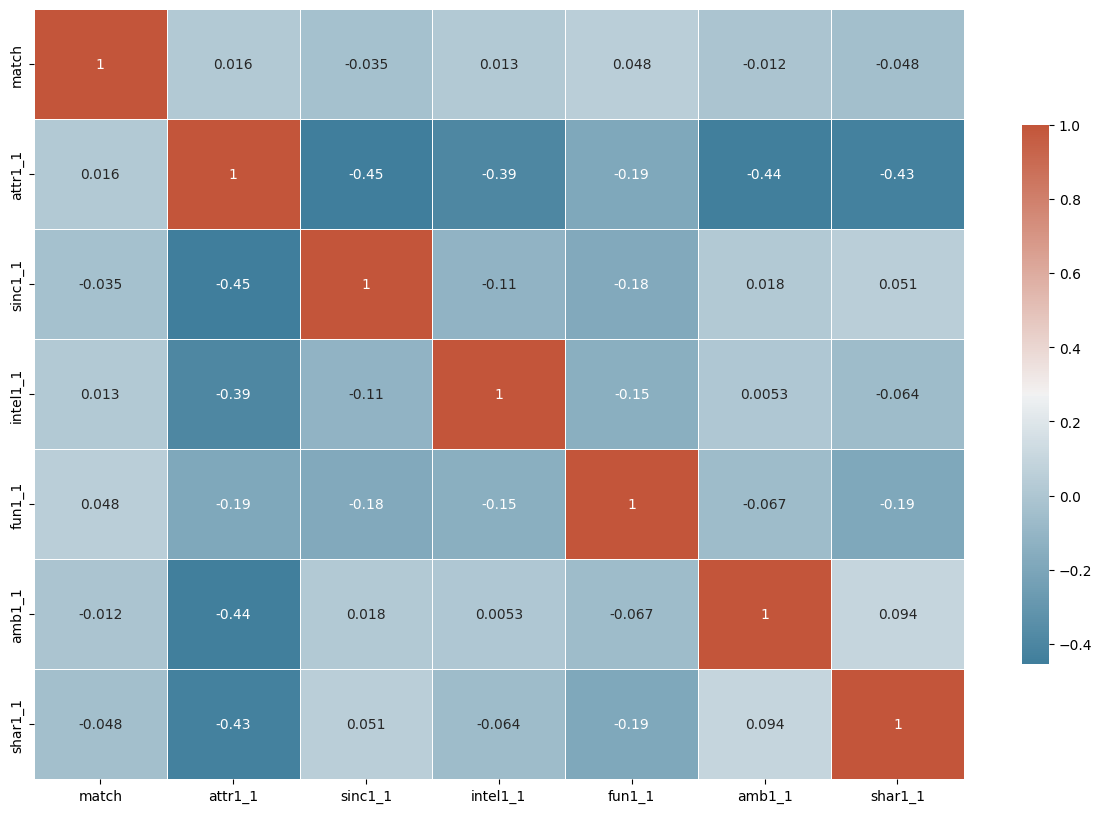

In [48]:
# visuel de la corrélation
f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(corr_attrb, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_attrb, annot=True, cmap=cmap, cbar_kws={"shrink": .7}, linewidths=.5)


In [54]:
print("corrélation sur l'ensemble des genres \n")
print("Liste des attribue les plus corréle avec un match : \n" ,corr_attrb["match"].apply(abs).sort_values(ascending=False)[1:5])


corrélation sur l'ensemble des genres 

Liste des attribue les plus corréle avec un match : 
 fun1_1     0.047738
shar1_1    0.047501
sinc1_1    0.034849
attr1_1    0.015588
Name: match, dtype: float64


In [27]:
# filtre pour visuel des activiter par genre sur le global 
attribue_genre = df[["gender", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking","gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga",]].groupby("gender").mean()
rename_index = {0 : "Femme", 1 : "Homme"}
attribue_genre.rename(index=rename_index, inplace=True)

# filtre pour visuel des activiter par genre sur les matchs
df_match = df[(df["match"] == 1)]
attribue_genre_match = df_match[["gender", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking","gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga",]].groupby("gender").mean()
rename_index = {0 : "Femme", 1 : "Homme"}
attribue_genre_match.rename(index=rename_index, inplace=True)

fig = go.Figure()
fig2 = go.Figure()

fig.add_trace(go.Bar(
    y=list(attribue_genre.iloc[0]),
    x=attribue_genre.columns.values,
    name='Femme',
    marker=dict(
        color='blue'
    ),  
))

fig.add_trace(go.Bar(
    y=list(attribue_genre.iloc[1]),
    x=attribue_genre.columns.values,
    name='Homme',
    marker=dict(
        color='pink'
    ),  
))

fig2.add_trace(go.Bar(
    y=list(attribue_genre_match.iloc[0]),
    x=attribue_genre_match.columns.values,
    name='Femme',
    marker=dict(
        color='blue'
    ),  
))

fig2.add_trace(go.Bar(
    y=list(attribue_genre_match.iloc[1]),
    x=attribue_genre_match.columns.values,
    name='Homme',
    marker=dict(
        color='pink'
    ),  
))

fig.update_layout(
    width=1000,
    title='Moyenne des activités recensé sur le global',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig2.update_layout(
    width=1000,
    title='Moyenne des activités recensé sur les matchs',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)

fig.show()
fig2.show()

In [35]:
attribue_homme = df_homme[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean(axis=0)
attribue_femme = df_femme[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean(axis=0)
rename_col = {"attr1_1": "Attractive" , "sinc1_1": "Sincère" , "intel1_1": "Intélligence", "fun1_1": "Fun", "amb1_1": "Ambitieux", "shar1_1": "Intérêts partagés" }
rename_index = {0 : "Femme", 1 : "Homme"}
attribue_homme.rename(index=rename_index, inplace=True)
attribue_femme.rename(index=rename_index, inplace=True)
liste_caract = ["Attractive", "Sincère", "Intélligence", "Fun", "Ambitieux", "Intérêts partagés"]

df_match_homme = df[(df["match"] == 1 & (df["gender"] == 1) )]
df_match_femme = df[(df["match"] == 1 & (df["gender"] == 0) )]
attribue_match_homme = df_match_homme[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean(axis=0)
attribue_match_femme = df_match_femme[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean(axis=0)
rename_col = {"attr1_1": "Attractive" , "sinc1_1": "Sincère" , "intel1_1": "Intélligence", "fun1_1": "Fun", "amb1_1": "Ambitieux", "shar1_1": "Intérêts partagés" }
rename_index = {0 : "Femme", 1 : "Homme"}
attribue_match_homme.rename(index=rename_index, inplace=True)
attribue_match_femme.rename(index=rename_index, inplace=True)
liste_caract = ["Attractive", "Sincère", "Intélligence", "Fun", "Ambitieux", "Intérêts partagés"]


fig3 = go.Figure()
fig4 = go.Figure()


fig3.add_trace(go.Scatterpolar(
      r=attribue_homme,
      theta=liste_caract,
      name='Homme',
      line_color="blue"
      ))
fig3.add_trace(go.Scatterpolar(
      r=attribue_femme,
      theta=liste_caract,
      name='Femme',
      line_color="pink"
      ))

fig4.add_trace(go.Scatterpolar(
      r=attribue_match_homme,
      theta=liste_caract,
      name='Homme',
      line_color="blue"
      ))
fig4.add_trace(go.Scatterpolar(
      r=attribue_match_femme,
      theta=liste_caract,
      name='Femme',
      line_color="pink"
      ))

fig3.update_layout(
                  width=700,
                  polar=dict(
                  radialaxis=dict(
                        visible=True, 
                        range=[0, 30]), 
                        radialaxis_showticklabels=False, 
                        radialaxis_showline=False),
                        title= {'x' : 0.5},
                        title_text="Attribue rechercher par les participants par genre global",
                  font=dict(
                  size=16
            )) 
fig4.update_layout(
                  width=700,
                  polar=dict(
                  radialaxis=dict(
                        visible=True, 
                        range=[0, 30]), 
                        radialaxis_showticklabels=False, 
                        radialaxis_showline=False),
                        title= {'x' : 0.5},
                        title_text="Attribue rechercher par les participants par genre pour les matchs",
                  font=dict(
                  size=16
            ))

fig3.update_polars(angularaxis_direction="clockwise")
fig3.update_traces(fill='toself')

fig4.update_polars(angularaxis_direction="clockwise")
fig4.update_traces(fill='toself')

fig3.show()
fig4.show()
